In [1]:
from sklearn.cluster import KMeans;import matplotlib.pyplot as plt; import pandas as pd; import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
SEED = 42

In [2]:
df = pd.read_csv('../data/geohash_address_available_hourly_data.csv') #the dataframe contains traffic density point address, coordinates, amount of data available
df = df.loc[df['data_amount']>28000]# choose only the points with over 28k data
# print(df.shape)
# print(df.info())

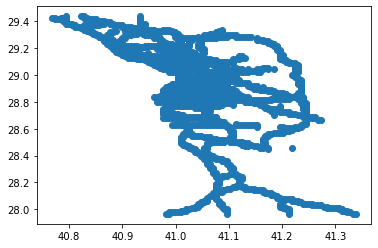

In [3]:
x = df['LATITUDE']
y = df['LONGITUDE']

plt.scatter(x, y)
plt.show() 

# Silhoutte Method

In [10]:
def train_kmeans(x,y):
  data = list(zip(x, y))
  ks = np.linspace(2, 20, 19, dtype=np.int64)
  inertias = []
  silhouettes = []
  kmeans_k = []
  for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=SEED)
    kmeans.fit(data)

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(data, kmeans.labels_))
    kmeans_k.append(kmeans)

  return kmeans_k, inertias, silhouettes, ks

In [11]:
kmeans_k, inertias, silhouettes, ks = train_kmeans(x,y)
print(silhouettes)

[0.5505548454174848, 0.5110861835568964, 0.4809764029348904, 0.43250869889511734, 0.38709977375853405, 0.4123644635003678, 0.4069890425782332, 0.4183733860229452, 0.39224911141325774, 0.39625882808308804, 0.3944215381876066, 0.40136027270794145, 0.4147552757260635, 0.40626936019223814, 0.39577329025259855, 0.3952141044244881, 0.3979593171773125, 0.4018066577356555, 0.3974646278089541]


In [13]:
ks

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found

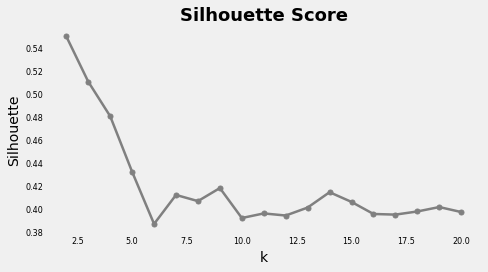

In [12]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(ks, silhouettes, "o-", color="grey", linewidth=2.5, markersize=5)

ax.set_xlabel("$k$", fontsize=14)
ax.set_ylabel("Silhouette", fontsize=14)
ax.tick_params(axis='both', labelsize=8)

ax.set_title("Silhouette Score", fontsize=18, fontweight="bold")
ax.grid(False)

plt.tight_layout()
plt.savefig("silhouette_score.png", dpi=600, transparent=True)
plt.show()

In [ ]:
range_n_clusters = [3, 4, 5, 6]

fig, ax = plt.subplots(4, 2, figsize=(16, 20))

# [0, 0] [0, 1] 
# [1, 0] [1, 1]
# [2, 0] [2, 1]
# [3, 0] [3, 1]

for row, n_clusters in enumerate(range_n_clusters):

  # Create a subplot with 1 row and 2 columns
  # fig, (ax1, ax2) = plt.subplots(1, 2)
  
  # fig.set_size_inches(12, 6)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax[row, 0].set_xlim([-0.1, 1])

  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax[row, 0].set_ylim([0, len(X) + (n_clusters + 1) * 10])

  # get predictions for each label
  cluster_labels = kmeans_k[n_clusters-2].predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(X, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)
  
  # Compute the silhouette score for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax[row, 0].fill_betweenx(np.arange(y_lower, y_upper),
                           0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax[row, 0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

  ax[row, 0].set_title("Silhouette diagram with $k$ = {}".format(n_clusters), fontsize=16)
  ax[row, 0].set_xlabel("Silhouette coefficient values", fontsize=14)
  ax[row, 0].set_ylabel("Cluster label", fontsize=12)
  
  ax[row, 0].set_yticks([])  # Clear the yaxis labels / ticks
  ax[row, 0].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
  ax[row, 0].tick_params(axis='both', which='major', labelsize=12)

  # The vertical line for average silhouette score of all the values
  ax[row, 0].axvline(x=silhouette_avg, color="black", linestyle="--", linewidth=2)

  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax[row, 1].scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                     c=colors, edgecolor='k')
  
  # Labeling the clusters
  centers = kmeans_k[n_clusters-2].cluster_centers_
  # Draw white circles at cluster centers
  ax[row, 1].scatter(centers[:, 0], centers[:, 1], marker='o',
                     c="white", alpha=1, s=200, edgecolor='k')
  
  for i, c in enumerate(centers):
    ax[row, 1].scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                       s=50, edgecolor='k')

  ax[row, 1].set_title(f"Clustered data with k = {n_clusters}", fontsize=16)
  ax[row, 1].set_xlabel("$x_1$", fontsize=14)
  ax[row, 1].set_ylabel("$x_2$", fontsize=14)
  ax[row, 1].set_yticks([])  # Clear the yaxis labels / ticks
  ax[row, 1].set_xticks([])

  ax[row, 1].grid(False)

  # fig.suptitle(("Silhouette analysis for KMeans clustering "
  # "with $k$ = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig("silhouette_diagram.png", dpi=650, transparent=False)
plt.show()

# Elbow Method

Determine the optimum k value using the elbow method

In [ ]:


data = list(zip(x, y))
inertias = []
k_upper_limit = 30
for i in range(4,k_upper_limit):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(4,k_upper_limit), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

The elbow method shows that 10 may be a good value for K, so we retrain and visualize the result.
**Note**: Others may also prefer another value. The elbow method, as you can see, is an approximate method whose observations differ from person to person.

/home/rukshar/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


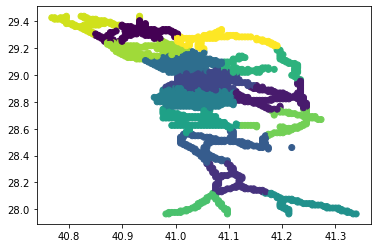

In [4]:
data = list(zip(x, y))
kmeans = KMeans(n_clusters=15)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show() 

Let's add the labels and the centroid values to the geohash dataframe and save it 

In [5]:
(kmeans.labels_)

array([ 6,  5,  5, ..., 12, 10, 10], dtype=int32)

In [6]:
kmeans.cluster_centers_

array([[40.9280718 , 29.31422199],
       [41.18631005, 28.83429876],
       [41.10153182, 28.21884153],
       [41.06027035, 28.95363684],
       [41.08267566, 28.47684187],
       [41.01367954, 29.09126865],
       [41.0342497 , 28.83013171],
       [41.24122755, 28.03521178],
       [41.03694362, 28.66899769],
       [41.16160318, 29.06820856],
       [41.05120838, 28.02990724],
       [41.21333913, 28.6551302 ],
       [40.94592707, 29.18443916],
       [40.83458679, 29.38878218],
       [41.077247  , 29.26462033]])

In [7]:
df['label'] = kmeans.labels_

In [8]:
df.head(4)

,GEOHASH,LATITUDE,LONGITUDE,ISO3166-2-lvl4,aeroway,amenity,building,city,city_district,club,...,region,residential,road,shop,suburb,tourism,town,village,data_amount,label
0,sxk3xw,41.080627,28.811646,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,Marmara Bölgesi,NaN,Yaşar Doğu Bulvarı,NaN,İkitelli OSB Mahallesi,NaN,Başakşehir,NaN,28504,6
1,sxk9nm,40.987244,29.108276,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,Marmara Bölgesi,NaN,Küçükbakkalköy Bağlantısı,NaN,Atatürk Mahallesi,NaN,Ataşehir,NaN,28504,5
2,sxk9q0,41.003723,29.097290,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,Marmara Bölgesi,NaN,3100. Sokak,NaN,Mustafa Kemal Mahallesi,NaN,Ataşehir,NaN,28492,5
3,sxk3hx,40.998230,28.679810,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,Marmara Bölgesi,NaN,NaN,NaN,Yakuplu Mahallesi,NaN,Beylikdüzü,NaN,28496,8


In [9]:
centroid_lat = [kmeans.cluster_centers_[i][0] for i in kmeans.labels_]
centroid_lon = [kmeans.cluster_centers_[i][1] for i in kmeans.labels_]

In [10]:
df['centroid_lat'] = centroid_lat
df['centroid_lon'] = centroid_lon

In [11]:
df.head(5)

,GEOHASH,LATITUDE,LONGITUDE,ISO3166-2-lvl4,aeroway,amenity,building,city,city_district,club,...,road,shop,suburb,tourism,town,village,data_amount,label,centroid_lat,centroid_lon
0,sxk3xw,41.080627,28.811646,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,Yaşar Doğu Bulvarı,NaN,İkitelli OSB Mahallesi,NaN,Başakşehir,NaN,28504,6,41.034250,28.830132
1,sxk9nm,40.987244,29.108276,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,Küçükbakkalköy Bağlantısı,NaN,Atatürk Mahallesi,NaN,Ataşehir,NaN,28504,5,41.013680,29.091269
2,sxk9q0,41.003723,29.097290,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,3100. Sokak,NaN,Mustafa Kemal Mahallesi,NaN,Ataşehir,NaN,28492,5,41.013680,29.091269
3,sxk3hx,40.998230,28.679810,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Yakuplu Mahallesi,NaN,Beylikdüzü,NaN,28496,8,41.036944,28.668998
4,sx7cmx,41.042175,28.020630,TR-34,NaN,NaN,NaN,NaN,NaN,NaN,...,Dertli Sokak,NaN,Gümüşyaka Mahallesi,NaN,Silivri,NaN,28297,10,41.051208,28.029907


In [12]:
df.to_csv('geohash_traffic_density_pt_15clusters.csv', index=False)

In [13]:
df.label.unique()

array([ 6,  5,  8, 10,  9,  1,  4,  3, 12,  0, 11,  2, 14, 13,  7],
      dtype=int32)